# 令和6年自転車盗難状況報告書

このレポートでは、令和6年に発生した全国の自動車盗難状況についてのまとめと考察を行う。

In [1]:
%pip install pandas
import pandas as pd


moto = pd.read_csv("jitennsya de-ta.csv")
jinnkou = pd.read_csv("jinnkou.csv")



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
moto.groupby('市区町村（発生地）').size().sort_values(ascending=False)

市区町村（発生地）
船橋市        1263
市川市         872
柏市          691
松戸市         678
千葉市中央区      656
八千代市        458
習志野市        450
浦安市         435
野田市         367
千葉市稲毛区      334
千葉市美浜区      328
千葉市若葉区      313
流山市         302
千葉市花見川区     290
市原市         285
千葉市緑区       213
成田市         211
四街道市        165
木更津市        157
佐倉市         146
鎌ケ谷市        140
印西市         125
八街市         115
我孫子市        114
東金市         103
茂原市          94
君津市          84
旭市           64
白井市          63
館山市          52
富津市          45
袖ケ浦市         42
富里市          31
銚子市          30
酒々井町         30
大網白里市        26
山武市          24
香取市          22
一宮町          21
鴨川市          16
いすみ市         15
栄町           14
横芝光町         11
匝瑳市           9
長生村           9
南房総市          8
鋸南町           5
多古町           4
九十九里町         3
東庄町           3
神崎町           2
勝浦市           1
御宿町           1
睦沢町           1
白子町           1
dtype: int64

市区町村ごとの件数を出したところ、船橋市が最も盗難が多いことがわかります。
しかしこのままのデータだと、船橋市が最も窃盗されやすいという風に誤解しかねません。
なので、今度は市町村の人口あたりの自転車盗難発生率を調べていきましょう。

In [3]:
moto.groupby('発生時（始期）').size().sort_values(ascending=False)

発生時（始期）
7     919
18    875
17    859
16    695
8     675
19    606
12    508
20    500
15    473
10    433
21    413
9     411
13    390
14    388
11    371
6     333
22    311
23    229
0     167
不明    115
5     113
1      74
2      32
4      30
3      23
dtype: int64

In [4]:
moto.groupby('施錠関係').size()

施錠関係
施錠した    3162
施錠せず    6781
dtype: int64

In [5]:
moto['発生日'] = pd.to_datetime(df['発生年月日（始期）'], format="%Y%m%d", errors='coerce')
moto['月'] = moto['発生日'].dt.month
moto.groupby('月').size()

NameError: name 'df' is not defined

In [ ]:
moto.groupby('被害者の職業').size().sort_values(ascending=False)

被害者の職業
その他            4968
高校生            2208
大学生            1612
中学生             886
小学生             239
法人・団体、被害者なし      30
dtype: int64

In [ ]:
%pip install matplotlib
import matplotlib as pd

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


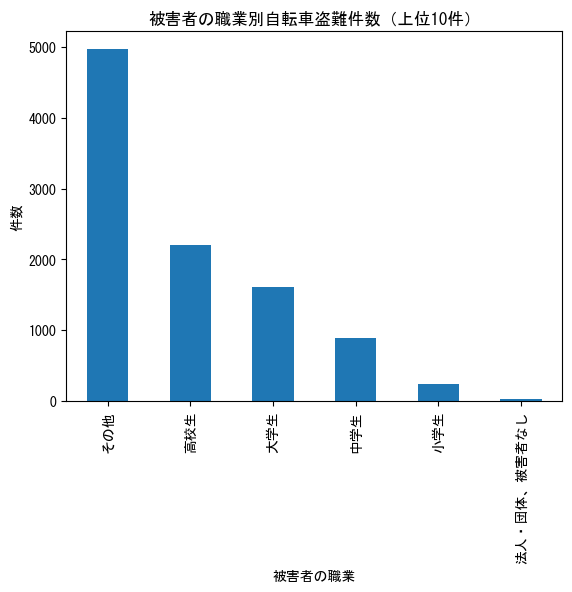

In [ ]:
# bar graph of 被害者の職業
import matplotlib.pyplot as plt

# fix japanese font issue for mac
plt.rcParams['font.family'] = 'Hiragino Sans'

# fix japanese font issue for windows
plt.rcParams['font.family'] = 'MS Gothic'

occupation_counts = df['被害者の職業'].value_counts().head(10)  # top 10 occupations
occupation_counts.plot(kind='bar')
plt.xlabel('被害者の職業')
plt.ylabel('件数')
plt.title('被害者の職業別自転車盗難件数（上位10件）')
plt.show()

In [ ]:
jinnkou

,市町村名,人口
0,千葉市,"979,877"
1,中央区,"215,549"
2,花見川区,"177,457"
3,稲毛区,"160,139"
4,若葉区,"144,926"
5,緑区,"129,324"
6,美浜区,"152,482"
7,銚子市,"54,123"
8,市川市,"497,454"
9,船橋市,"647,056"


In [ ]:

a = jinnkou.loc[1, ['人口']].values[0]
a = int(a.replace(',', ''))
a

215549

In [ ]:
a = jinnkou.loc[3,['人口']].values[0].astype(int)
print(a)

AttributeError: 'str' object has no attribute 'astype'